In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

# Read in the dataset
df = pd.read_csv(r'C:\Users\panag\OneDrive\Documents\coding\Projects\AIbiotics\mycobacteria_ml_project\training_data\training_dataset_final\03_training_set.csv')

df["Molecule"] = df["canonical_smiles"].apply(Chem.MolFromSmiles)

# Generate Morgan fingerprints (non-bit-vector)
df["Fingerprint"] = df["Molecule"].apply(
    lambda mol: AllChem.GetMorganFingerprint(mol, radius=2) if mol else None
)

# Initialize an empty similarity matrix
n = len(df)
similarity_matrix = np.zeros((n, n))

# Compute pairwise Tanimoto similarity using RDKit
for i in range(n):
    fp_i = df["Fingerprint"][i]
    if fp_i is None:
        continue  # Leaves row/column as zeros for invalid SMILES
    for j in range(i, n):  # Upper triangle only (avoids redundant work)
        fp_j = df["Fingerprint"][j]
        if fp_j is None:
            continue
        similarity = DataStructs.TanimotoSimilarity(fp_i, fp_j)
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # Symmetric matrix

# Convert to DataFrame for saving
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)
similarity_df.to_csv("tanimoto_similarity_matrix_morgan.csv")

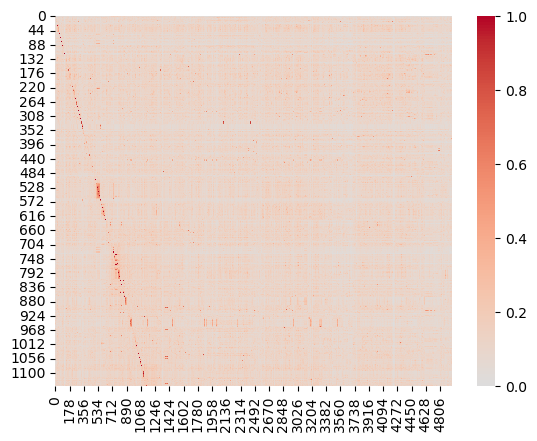

In [ ]:
# turn the tanimoto similarities into a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_df, cmap="coolwarm", center=0)
plt.show()

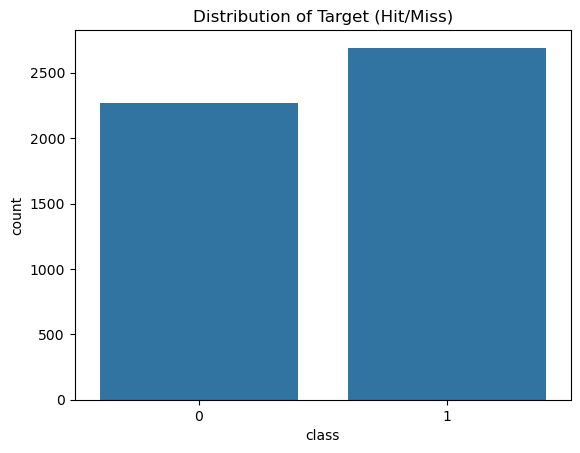

In [3]:
# Checking the hits and miss rates
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'C:\Users\panag\OneDrive\Documents\coding\Projects\AIbiotics\mycobacteria_ml_project\training_data\02_data_clean\04_hitmiss_reduced.csv')

# Plot the distribution of the target variable (hit/miss)
sns.countplot(x='class', data=df)
plt.title('Distribution of Target (Hit/Miss)')
plt.show()
